In [1]:
from cellOpt import *

In [2]:
#Shape defining parameters and true solution
a = 0.3; b = 5
def G(x, y): return Gr(a, b, x, y)

trueCoff = jnp.array([0, 0, a/2, 0, 0, 0, 0, 1, 0, 0, 0, 0, a/2])
trueLoss = konc(trueCoff, G, 32)


In [3]:

#Find initial guess based on true solution
initCoff = findInitialGuess(trueCoff)
maxfreq = jnp.floor(len(initCoff)/2)
freq = jnp.linspace(-maxfreq, maxfreq, len(initCoff))


In [4]:
colormap = 'Blues'
colors = [
"#ed95ee",'#FF0000',
"#fff200"]
linestyles = ['solid','dotted', 'dashdot']


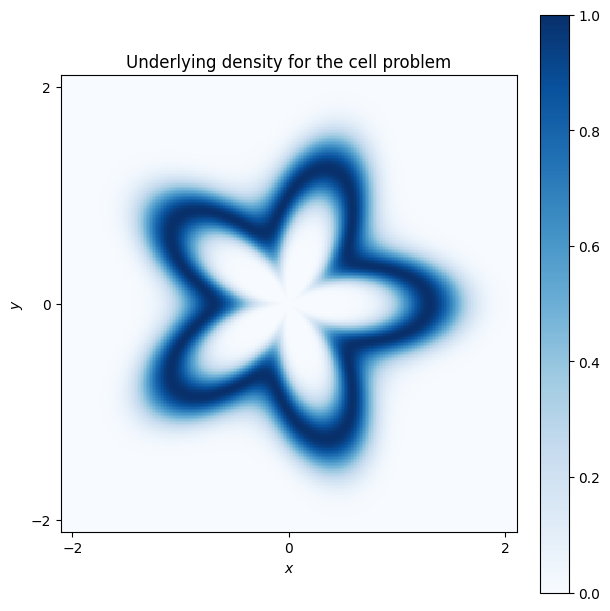

In [5]:
X, Y = jnp.meshgrid(jnp.linspace(-2.1, 2.1, 300), jnp.linspace(-2.1, 2.1, 300))
g = jnp.array(vmap(G)(X, Y))
fig, axes = plt.subplots(figsize=(6,6), layout='constrained')
im = axes.pcolormesh(X, Y, g, cmap=colormap, vmin=0, vmax=1)
fig.colorbar(im, ax=axes)
plt.title('Underlying density for the cell problem')
axes.set_ylabel(r'$y$')
axes.set_xlabel(r'$x$')
axes.set_aspect('equal')
axes.set_yticks([-2,0, 2])
axes.set_xticks([-2, 0, 2])

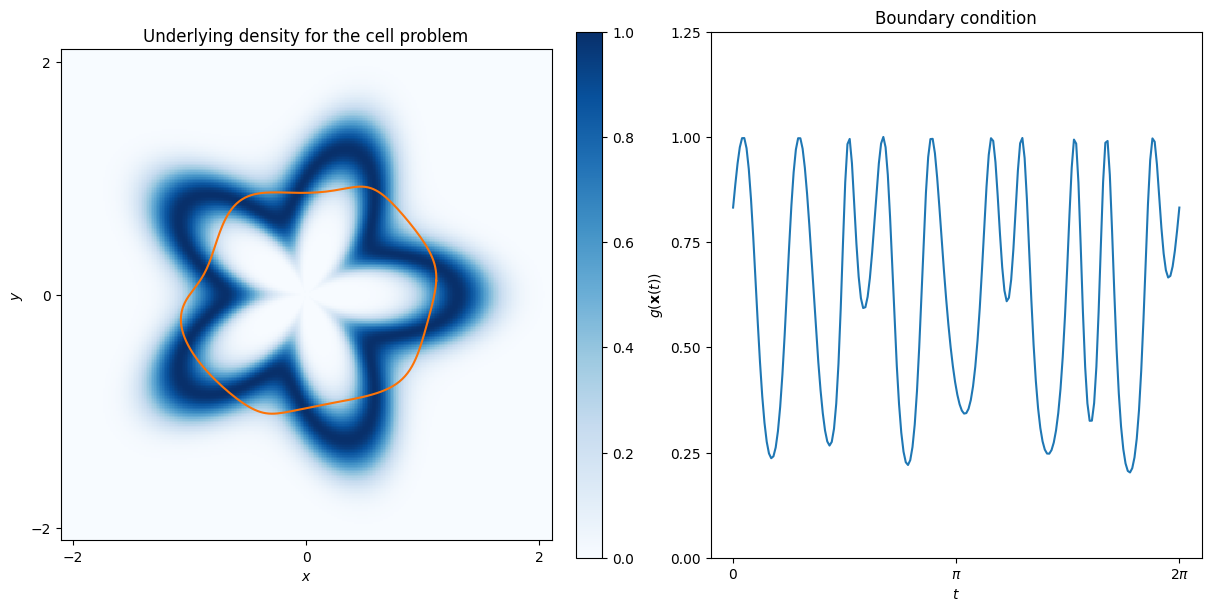

In [6]:
coeff = findInitialGuess(trueCoff, seed=7)
t = jnp.linspace(0, 2*jnp.pi, 200)
x = vmap(Fourier(coeff))(t)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), layout='constrained')
im = axes[0].pcolormesh(X, Y, g, cmap=colormap, vmin=0, vmax=1)
fig.colorbar(im, ax=axes[0])
axes[0].set_title('Underlying density for the cell problem')
axes[0].plot(*x, color="#fc7307")
axes[0].set_ylabel(r'$y$')
axes[0].set_xlabel(r'$x$')
axes[0].set_aspect('equal')
axes[0].set_yticks([-2,0, 2])
axes[0].set_xticks([-2, 0, 2])


axes[1].plot(t, vmap(G)(x[0], x[1]))
axes[1].set_title('Boundary condition')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'$g(\mathbf{x}(t))$')
axes[1].set_xticks([0, jnp.pi, jnp.pi*2], [r"$0$", r"$\pi$", r"$2\pi$"])
axes[1].set_yticks([0, 1/4, 1/2, 3/4, 1, 5/4])



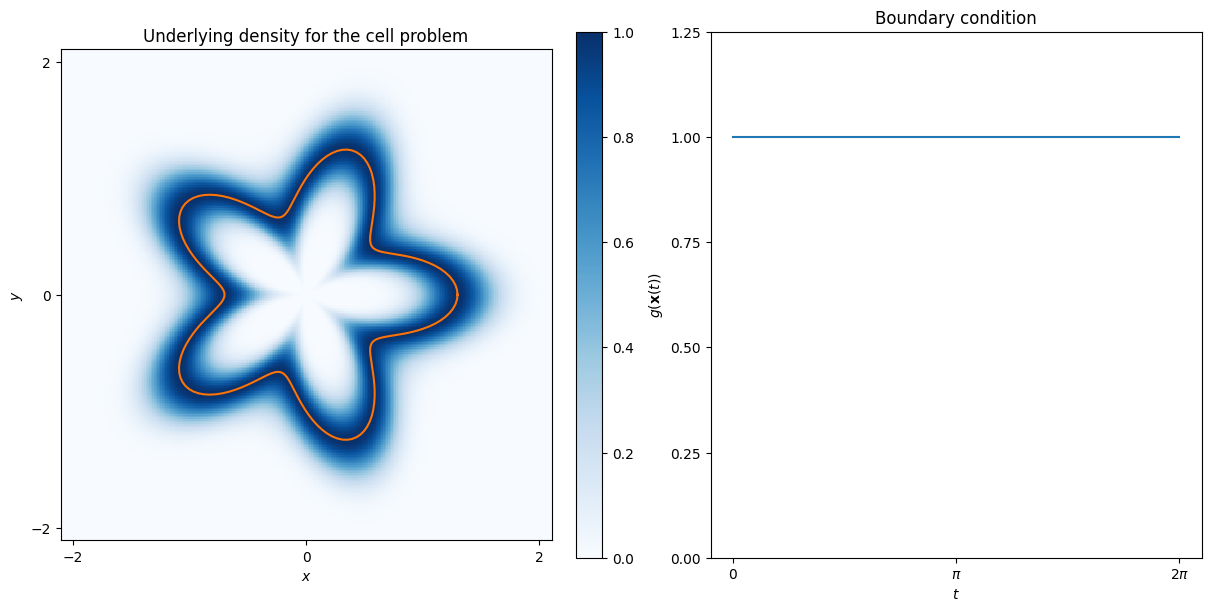

In [7]:
#coeff = findInitialGuess(trueCoff, circle=False, ellipseAxis1=1.5)
coeff = trueCoff
t = jnp.linspace(0, 2*jnp.pi, 200)
x = vmap(Fourier(coeff))(t)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), layout='constrained')
im = axes[0].pcolormesh(X, Y, g, cmap=colormap, vmin=0, vmax=1)
fig.colorbar(im, ax=axes[0])
axes[0].set_title('Underlying density for the cell problem')
axes[0].plot(*x, color="#fc7307")
axes[0].set_ylabel(r'$y$')
axes[0].set_xlabel(r'$x$')
axes[0].set_aspect('equal')
axes[0].set_yticks([-2,0, 2])
axes[0].set_xticks([-2, 0, 2])


axes[1].plot(t, vmap(G)(x[0], x[1]))
axes[1].set_title('Boundary condition')
axes[1].set_xlabel(r'$t$')
axes[1].set_ylabel(r'$g(\mathbf{x}(t))$')
axes[1].set_xticks([0, jnp.pi, jnp.pi*2], [r"$0$", r"$\pi$", r"$2\pi$"])
axes[1].set_yticks([0, 1/4, 1/2, 3/4, 1, 5/4])

In [11]:
def loss(c):
    return konc(c, G, 16)


_, coff1, _, _, loss1, _,gamma1 = cellGradSearch(G, initCoff,search= True, regularization=0, maxiterations=1, n=16, gam=1/2)
_, coff2, _, _, loss2, _, _ = cellGradSearch(G, initCoff, search=False,regularization= 0,maxiterations= 1, gam=2.5*gamma1[-1], n=16)
t = jnp.linspace(0, 2*jnp.pi, 100)
rstart = Fourier(initCoff)
rx, ry = vmap(rstart)(t)
drx, dry = vmap(Fourier(jnp.conjugate(grad(loss)(initCoff))))(t)

print(loss1[1]-loss1[0])

print(loss2[1]- loss2[0])


Iteration 0
Iteration 0
0.2641763
-0.17854366


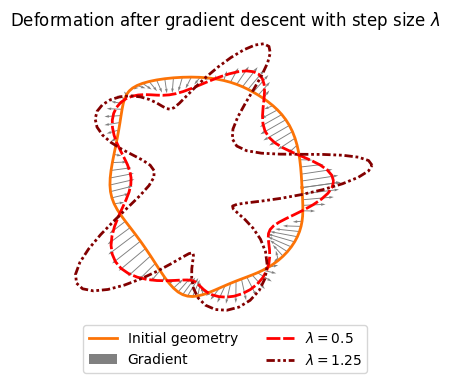

In [13]:
fig, axes = plt.subplots(figsize=(4,4))
lw = 2
axes.set_ylim(-1.4, 1.5)
axes.set_xlim(-1.4, 1.7)
axes.set_title(r"Deformation after gradient descent with step size $\lambda$")
axes.plot(rx, ry, color="#fc7307", label=f'Initial geometry', linewidth=lw)
axes.quiver(rx, ry, drx, dry, label=f'Gradient', color='gray', width = 0.003)
axes.plot(*vmap(Fourier(coff1[-1]))(t), color="r", linestyle=(0, (5, 1)), label=r'$\lambda = $' + f'{gamma1[-1]}', linewidth=lw)
axes.plot(*vmap(Fourier(coff2[-1]))(t), color='#820000', linestyle=(0, (3, 1, 1, 1, 1, 1)), label=r'$\lambda = $' + f'{2.5*gamma1[-1]}', linewidth=lw)
axes.set_aspect('equal')
plt.axis('off')
plt.figlegend(loc=8, ncols=2)